In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using: {device}')

In [ ]:
batch_size = 64
learning_rate = 0.0001
num_epochs = 10

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = SimpleNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
model.eval()  # Режим оценки
correct = 0
total = 0

with torch.no_grad():  # Не вычисляем градиенты
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

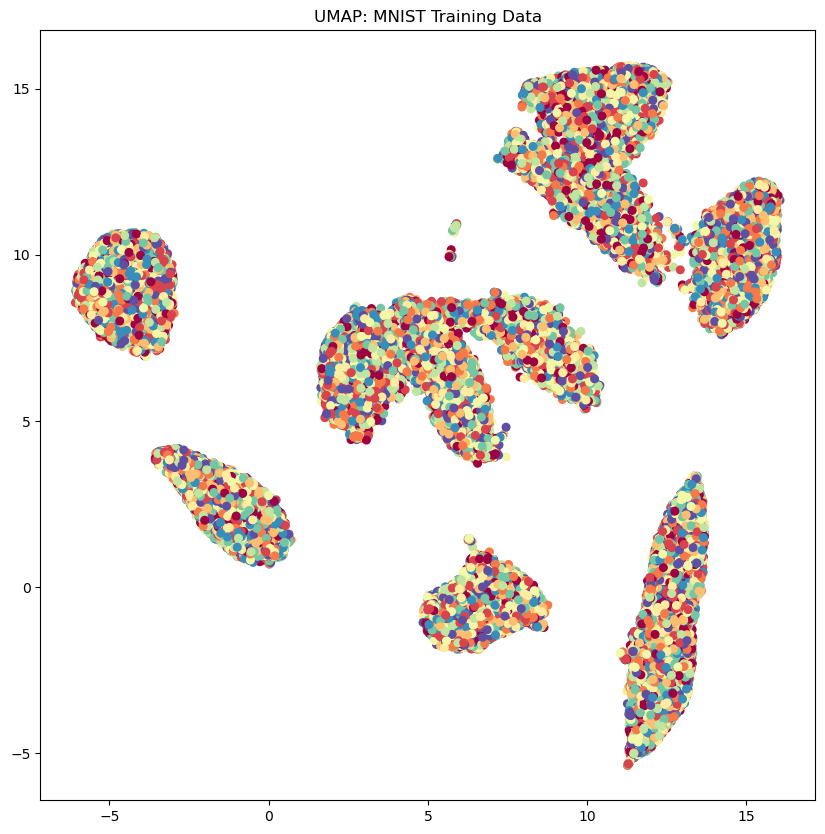

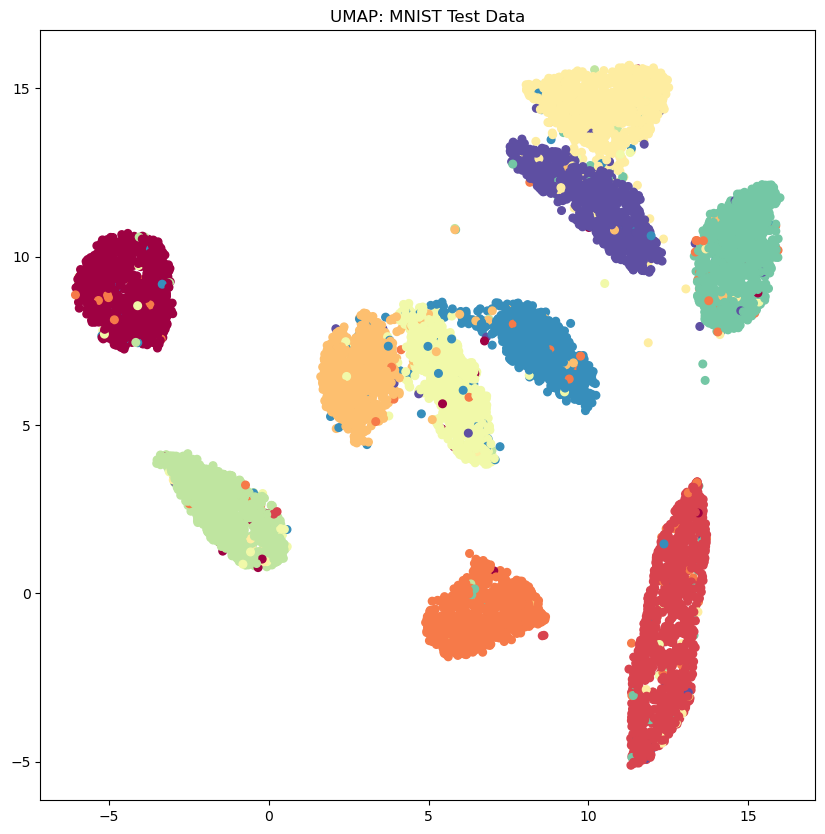

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import umap

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

def normalize_data(data):
    return data.view(-1, 784).numpy() / 255.0

train_data = torch.cat([batch[0] for batch in trainloader])
train_labels = torch.cat([batch[1] for batch in trainloader])
train_data = normalize_data(train_data)

test_data = torch.cat([batch[0] for batch in testloader])
test_labels = torch.cat([batch[1] for batch in testloader])
test_data = normalize_data(test_data)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1)
X_umap_train = reducer.fit_transform(train_data)
X_umap_test = reducer.transform(test_data)

plt.figure(figsize=(10, 10))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=train_labels.numpy(), cmap='Spectral', s=30)
plt.title('UMAP: MNIST Training Data')
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=test_labels.numpy(), cmap='Spectral', s=30)
plt.title('UMAP: MNIST Test Data')
plt.show()

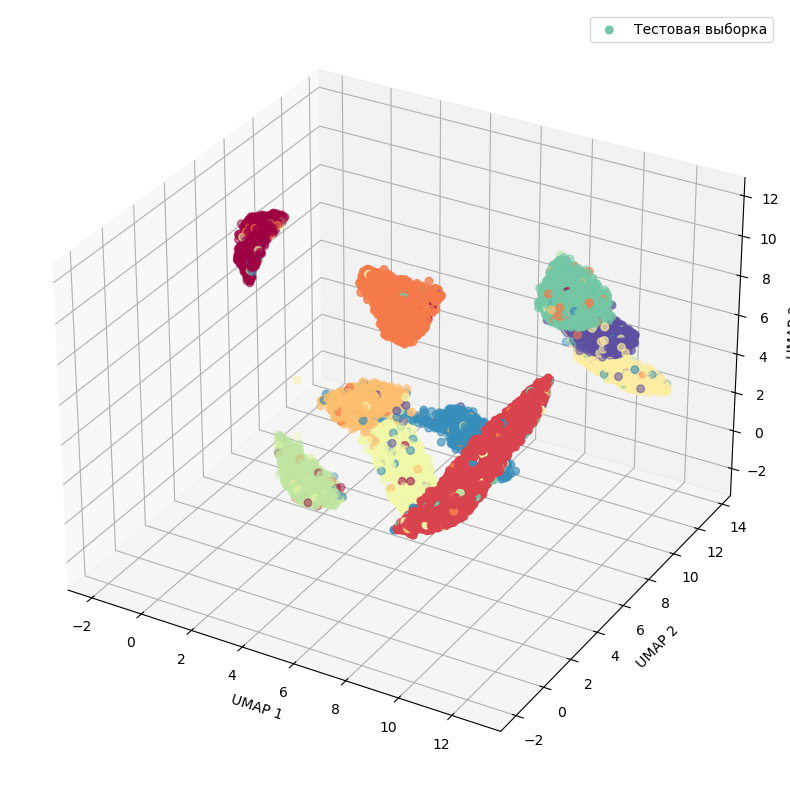

In [4]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import umap

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


def normalize_data(data):
    return data.view(-1, 784).numpy() / 255.0

train_data = torch.cat([batch[0] for batch in trainloader])
train_labels = torch.cat([batch[1] for batch in trainloader])
train_data = normalize_data(train_data)

test_data = torch.cat([batch[0] for batch in testloader])
test_labels = torch.cat([batch[1] for batch in testloader])
test_data = normalize_data(test_data)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3)
X_umap_train = reducer.fit_transform(train_data)
X_umap_test = reducer.transform(test_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_umap_test[:, 0], X_umap_test[:, 1], X_umap_test[:, 2], c=test_labels.numpy(), cmap='Spectral', s=30, label='Тестовая выборка')

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

ax.legend()

plt.show()